In [1]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np

In [50]:
# 读取路径，获得图片名称
file_path = os.path.join(os.getcwd(),r'F:\wujieyu\img test\TestDataset\Kvasir\images\img')
file_names = os.listdir(file_path)

In [51]:
print (file_path)
print (file_names)

F:\wujieyu\img test\TestDataset\Kvasir\images\img
['cju0u82z3cuma0835wlxrnrjv.png', 'cju15wdt3zla10801odjiw7sy.png', 'cju16ach3m1da0993r1dq3sn2.png', 'cju16whaj0e7n0855q7b6cjkm.png', 'cju17z0qongpa0993de4boim4.png', 'cju1amqw6p8pw0993d9gc5crl.png', 'cju1bm8063nmh07996rsjjemq.png', 'cju1c3218411b08014g9f6gig.png', 'cju1cbokpuiw70988j4lq1fpi.png', 'cju1cj3f0qi5n0993ut8f49rj.png', 'cju1cqc7n4gpy0855jt246k68.png', 'cju1ddr6p4k5z08780uuuzit2.png', 'cju1f8w0t65en0799m9oacq0q.png', 'cju1h89h6xbnx08352k2790o9.png', 'cju1hp9i2xu8e0988u2dazk7m.png', 'cju2hfqnmhisa0993gpleeldd.png', 'cju2hjrqcvi2j0801bx1i6gxg.png', 'cju2hos57llxm08359g92p6jj.png', 'cju2hqt33lmra0988fr5ijv8j.png', 'cju2lberzkdzm09938cl40pog.png', 'cju2mh8t6p07008350e01tx2a.png', 'cju2nnqrqzp580855z8mhzgd6.png', 'cju2np2k9zi3v079992ypxqkn.png', 'cju2omjpeqj5a0988pjdlb8l1.png', 'cju2osuru0ki00855txo0n3uu.png', 'cju2pag1f0s4r0878h52uq83s.png', 'cju2rga4psq9n09881z519xx0.png', 'cju2rmd2rsw9g09888hh1efu0.png', 'cju2rqo702wpx0855fn7d5cx

In [52]:
# 得到每张图片的路径
img_paths = []
for file_name in file_names:
    img_paths.append(os.path.join(file_path,file_name))
len(img_paths)

# for i in img_paths:
#     print(i)

100

In [53]:
# # 读取彩图
# # 读取每一张图片
# img = np.zeros((len(file_names),288, 384, 3))
# for i in range(len(file_names)):
#     img0 = cv2.imread(img_paths[i],-1)
#     img0 = cv2.resize(img0,(384,288))
#     img0 = img0[...,::-1]
#     img[i] = img0/255

In [54]:
# print(img.shape)
# plt.imshow(img[1],'gray')

In [55]:
# 读取灰度图
# 读取每一张图片
img = np.zeros((len(file_names),288, 384))
for i in range(len(file_names)):
    img0 = cv2.imread(img_paths[i],0)
    img0 = cv2.resize(img0,(384,288))
    img[i] = img0

(100, 288, 384)


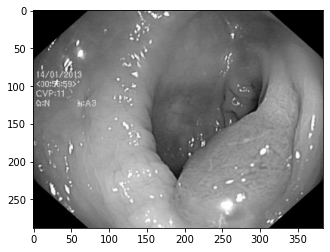

In [56]:
print(img.shape)
plt.imshow(img[1],'gray')

In [57]:
# 使用Roberts算子进行边缘提取
def useRoberts(grayImage):
    # Roberts算子
    kernelx = np.array([[-1, 0], [0, 1]], dtype=int)
    kernely = np.array([[0, -1], [1, 0]], dtype=int)
    x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx)
    y = cv2.filter2D(grayImage, cv2.CV_16S, kernely)
    # 转uint8
    absX = cv2.convertScaleAbs(x)
    absY = cv2.convertScaleAbs(y)
    Roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
    return Roberts

In [58]:
img[1].shape

(288, 384)

In [59]:
# 进行转换
imgnew = np.zeros((len(file_names),288, 384))
for i in range(len(file_names)):
    imgnew[i] = useRoberts(cv2.convertScaleAbs(img[i]))

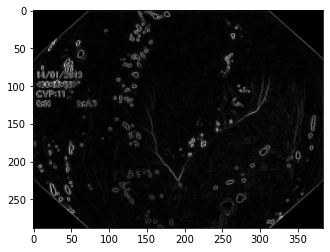

In [60]:
plt.imshow(imgnew[1],'gray')

In [61]:
# 保存图片
import time
from tqdm import trange

file_path = os.path.join(os.getcwd(),r'F:\wujieyu\img test\TestDataset\Kvasir\img edge\Roberts\bianyuan')
file_path = file_path + '\\'
for i in trange(5):
    for i in range(len(file_names)):
    #     grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #灰度化转换
    #     reImage = cv2.resize(grayImage, (200,200)) #缩放
        cv2.imwrite(file_path+file_names[i], imgnew[i]) #保存图片路径
    # do something
    time.sleep(0.5)
print("恭喜，运行完成，无bug") 

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

恭喜，运行完成，无bug


In [13]:
# 保存为h5文件
import time
from tqdm import trange
import h5py
for i in trange(10):
    f = h5py.File(r'F:\data\projiect_data\cvc\train\h5\img0Roberts.h5', 'w')
    f.create_dataset('img0Roberts', data=imgnew)
    f.close()
    time.sleep(0.5)
print("恭喜，运行完成，无bug")

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:55<00:00,  5.52s/it]

恭喜，运行完成，无bug
